## Binary classficiation on breast cancer dataset using "Gaussian determinant analysis"

#### Importing required libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Importing the dataset

In [23]:
dataset = pd.read_csv('Dataset/breast-cancer.csv')

# Head of the dataset

dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
# Info of dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### EDA

In [25]:
# Drop duplicate rows if any

dataset = dataset.drop_duplicates()

In [26]:
dataset.shape

(569, 32)

In [27]:
# Unique values in target variable

dataset['diagnosis'].unique()

array(['M', 'B'], dtype=object)

- 'M' - refers to malignant tumors
- 'B' - refers to benign tumors

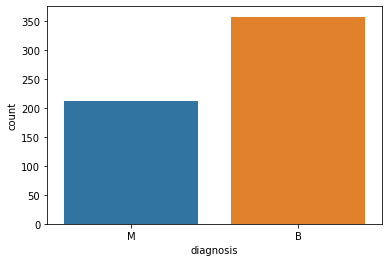

In [28]:
sns.countplot(data=dataset,x='diagnosis')
plt.show()

- There are more benign tumors than malignant ones in this dataset

#### Distribution of the mean features vs the 'diagnosis' variable

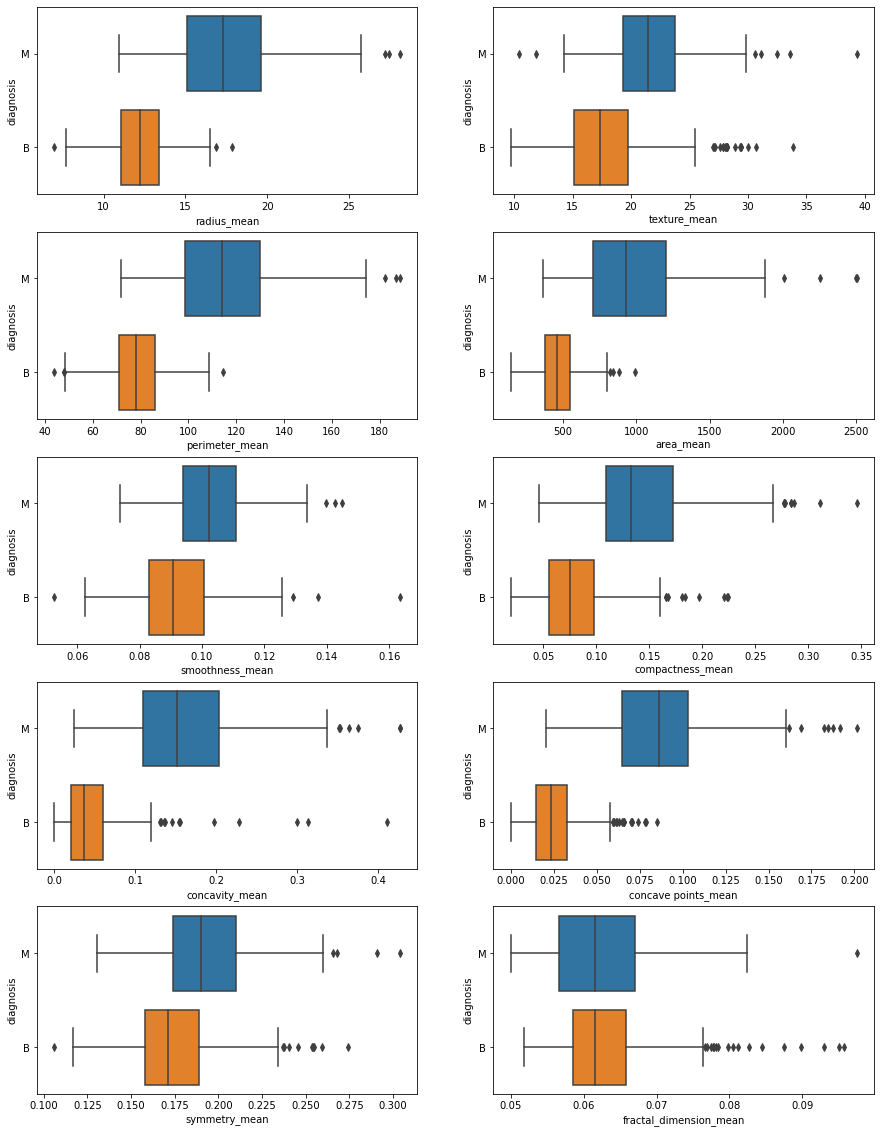

In [37]:
fig = plt.figure(figsize=(15,20))

ax1 = fig.add_subplot(5,2,1)
sns.boxplot(data=dataset,x='radius_mean',y='diagnosis',ax=ax1)

ax2 = fig.add_subplot(5,2,2)
sns.boxplot(data=dataset,x='texture_mean',y='diagnosis',ax=ax2)

ax3 = fig.add_subplot(5,2,3)
sns.boxplot(data=dataset,x='perimeter_mean',y='diagnosis',ax=ax3)

ax4 = fig.add_subplot(5,2,4)
sns.boxplot(data=dataset,x='area_mean',y='diagnosis',ax=ax4)

ax5 = fig.add_subplot(5,2,5)
sns.boxplot(data=dataset,x='smoothness_mean',y='diagnosis',ax=ax5)

ax6 = fig.add_subplot(5,2,6)
sns.boxplot(data=dataset,x='compactness_mean',y='diagnosis',ax=ax6)

ax7 = fig.add_subplot(5,2,7)
sns.boxplot(data=dataset,x='concavity_mean',y='diagnosis',ax=ax7)

ax8 = fig.add_subplot(5,2,8)
sns.boxplot(data=dataset,x='concave points_mean',y='diagnosis',ax=ax8)

ax9 = fig.add_subplot(5,2,9)
sns.boxplot(data=dataset,x='symmetry_mean',y='diagnosis',ax=ax9)

ax10 = fig.add_subplot(5,2,10)
sns.boxplot(data=dataset,x='fractal_dimension_mean',y='diagnosis',ax=ax10)

plt.show()

- <b>radius_mean</b> is more for malignant tumors than benign tumors
- <b>texture_mean</b> is more for malignant tumors than benign tumors
- <b>perimeter_mean</b> is more for malignant tumors than benign tumors
- <b>area_mean</b> is more for malignant tumors than benign tumors
- <b>smoothness_mean</b> is `slightly` more for malignant tumors than benign tumors
- <b>compactness_mean</b> is more for malignant tumors than benign tumors
- <b>concavity_mean</b> is more for malignant tumors than benign tumors
- <b>concave points_mean</b> is more for malignant tumors than benign tumors
- <b>symmetry_mean</b> is more for malignant tumors than benign tumors
- <b>fractal_dimension_mean</b> is `almost same` for malignant tumors and benign tumors

#### Distribution of the se features vs the 'diagnosis' variable

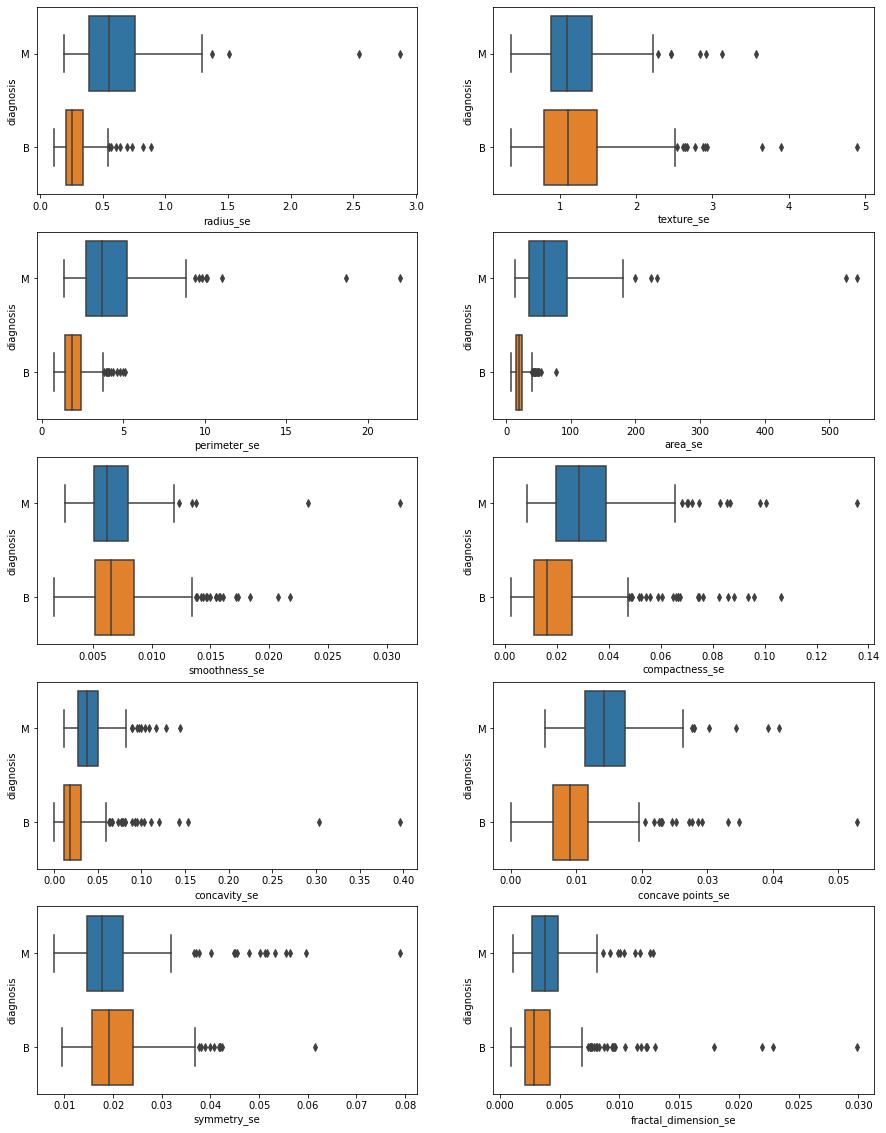

In [38]:
fig = plt.figure(figsize=(15,20))

ax1 = fig.add_subplot(5,2,1)
sns.boxplot(data=dataset,x='radius_se',y='diagnosis',ax=ax1)

ax2 = fig.add_subplot(5,2,2)
sns.boxplot(data=dataset,x='texture_se',y='diagnosis',ax=ax2)

ax3 = fig.add_subplot(5,2,3)
sns.boxplot(data=dataset,x='perimeter_se',y='diagnosis',ax=ax3)

ax4 = fig.add_subplot(5,2,4)
sns.boxplot(data=dataset,x='area_se',y='diagnosis',ax=ax4)

ax5 = fig.add_subplot(5,2,5)
sns.boxplot(data=dataset,x='smoothness_se',y='diagnosis',ax=ax5)

ax6 = fig.add_subplot(5,2,6)
sns.boxplot(data=dataset,x='compactness_se',y='diagnosis',ax=ax6)

ax7 = fig.add_subplot(5,2,7)
sns.boxplot(data=dataset,x='concavity_se',y='diagnosis',ax=ax7)

ax8 = fig.add_subplot(5,2,8)
sns.boxplot(data=dataset,x='concave points_se',y='diagnosis',ax=ax8)

ax9 = fig.add_subplot(5,2,9)
sns.boxplot(data=dataset,x='symmetry_se',y='diagnosis',ax=ax9)

ax10 = fig.add_subplot(5,2,10)
sns.boxplot(data=dataset,x='fractal_dimension_se',y='diagnosis',ax=ax10)

plt.show()

- <b>radius_se</b> is more for malignant tumors than benign tumors
- <b>texture_se</b> is `almost same` for malignant tumors and benign tumors , let us see if this feature can be removed
- <b>perimeter_se</b> is more for malignant tumors than benign tumors
- <b>area_se</b> is more for malignant tumors than benign tumors
- <b>smoothness_se</b> is `almost same` for malignant tumors and benign tumors , let us see if this feature can be removed
- <b>compactness_se</b> is `slightly` more for malignant tumors than benign tumors
- <b>concavity_se</b> is `slightly` more for malignant tumors than benign tumors
- <b>concave points_se</b> is more for malignant tumors than benign tumors
- <b>symmetry_se</b> is `almost same` for malignant tumors and benign tumors , let us see if this feature can be removed
- <b>fractal_dimension_se</b> is `almost same` for malignant tumors and benign tumors , let us see if this feature can be removed

#### Distribution of the worst features vs the 'diagnosis' variable

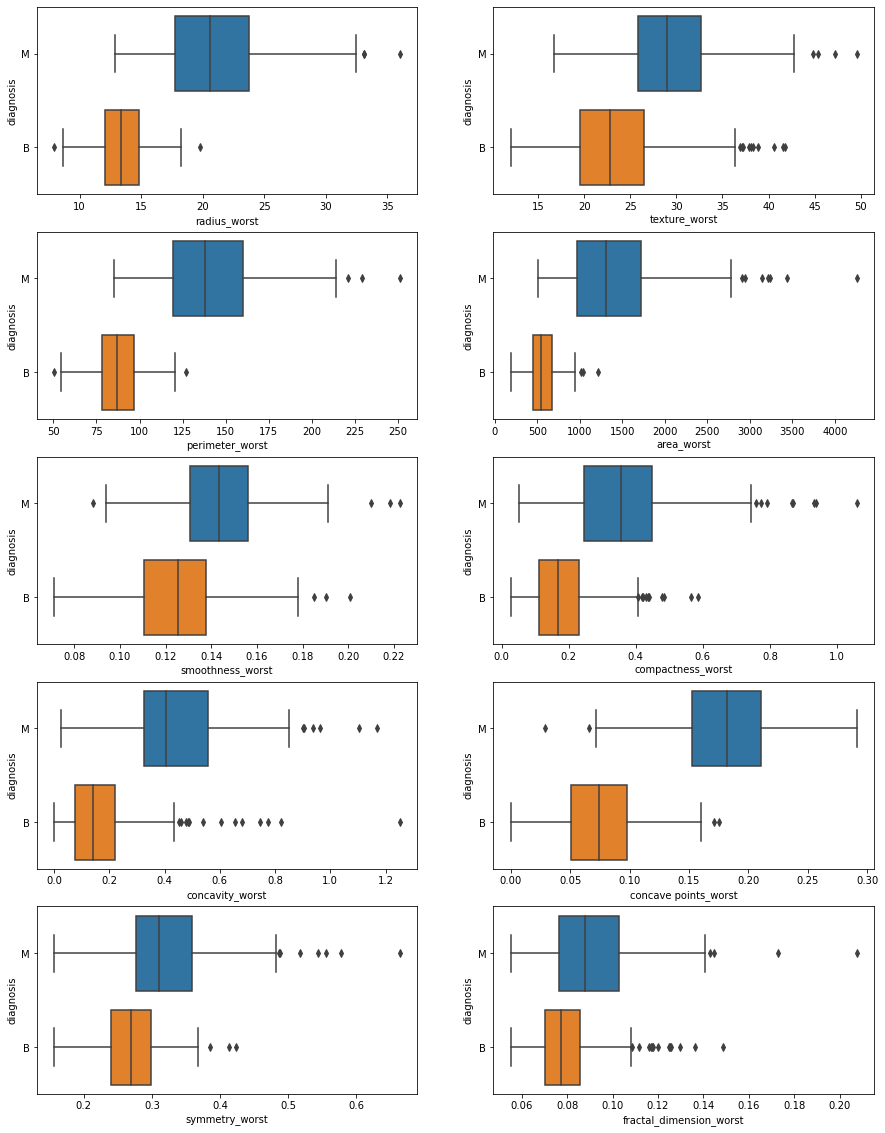

In [39]:
fig = plt.figure(figsize=(15,20))

ax1 = fig.add_subplot(5,2,1)
sns.boxplot(data=dataset,x='radius_worst',y='diagnosis',ax=ax1)

ax2 = fig.add_subplot(5,2,2)
sns.boxplot(data=dataset,x='texture_worst',y='diagnosis',ax=ax2)

ax3 = fig.add_subplot(5,2,3)
sns.boxplot(data=dataset,x='perimeter_worst',y='diagnosis',ax=ax3)

ax4 = fig.add_subplot(5,2,4)
sns.boxplot(data=dataset,x='area_worst',y='diagnosis',ax=ax4)

ax5 = fig.add_subplot(5,2,5)
sns.boxplot(data=dataset,x='smoothness_worst',y='diagnosis',ax=ax5)

ax6 = fig.add_subplot(5,2,6)
sns.boxplot(data=dataset,x='compactness_worst',y='diagnosis',ax=ax6)

ax7 = fig.add_subplot(5,2,7)
sns.boxplot(data=dataset,x='concavity_worst',y='diagnosis',ax=ax7)

ax8 = fig.add_subplot(5,2,8)
sns.boxplot(data=dataset,x='concave points_worst',y='diagnosis',ax=ax8)

ax9 = fig.add_subplot(5,2,9)
sns.boxplot(data=dataset,x='symmetry_worst',y='diagnosis',ax=ax9)

ax10 = fig.add_subplot(5,2,10)
sns.boxplot(data=dataset,x='fractal_dimension_worst',y='diagnosis',ax=ax10)

plt.show()

- <b>radius_worst</b> is more for malignant tumors than benign tumors
- <b>texture_worst</b> is more for malignant tumors than benign tumors
- <b>perimeter_worst</b> is more for malignant tumors than benign tumors
- <b>area_worst</b> is more for malignant tumors than benign tumors
- <b>smoothness_worst</b> is more for malignant tumors than benign tumors
- <b>compactness_worst</b> is more for malignant tumors than benign tumors
- <b>concavity_worst</b> is more for malignant tumors than benign tumors
- <b>concave points_worst</b> is more for malignant tumors than benign tumors
- <b>symmetry_worst</b> is more for malignant tumors than benign tumorss
- <b>fractal_dimension_worst</b> is more for malignant tumors than benign tumors

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5